In [2]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# import the required packages
import torch
import argparse
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

from torchvision.utils import save_image

from torchvision.utils import make_grid

from torch.utils.tensorboard import SummaryWriter
import datetime
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from PIL import Image


In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.12
!mkdir /root/.kaggle
import json
token={"username":"oluwadaraadedeji","key":"e056fc2d5451bcc8df5da32e3c77e7cf"}

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"oluwadaraadedeji","key":"e056fc2d5451bcc8df5da32e3c77e7cf"}') # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=9fb05e11866ac432dbee9884a24f9eb3cd9d76f51cf40d4072b49635a28ccc18
  Stored in directory: /root/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
# !mkdir /content/drive/MyDrive/Parasitized3

In [6]:
# !mkdir /content/drive/MyDrive/Parasitized3/subfolder_1

In [7]:
# !mkdir /content/drive/MyDrive/Parasitized3/subfolder_2

In [8]:
# !rmdir  --ignore-fail-on-non-empty /content/drive/MyDrive/Parasitized/subfolder_1

In [9]:

!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria



100% 672M/675M [00:07<00:00, 102MB/s]
100% 675M/675M [00:07<00:00, 91.0MB/s]


In [10]:
!unzip -q cell-images-for-detecting-malaria.zip


In [24]:
!mkdir /content/drive/MyDrive/Parasitized_generated

mkdir: cannot create directory ‘/content/drive/MyDrive/Parasitized_generated’: File exists


In [21]:
import os
os.makedirs("Parasitized_generated%d" % (1), exist_ok=True) 
cuda = True if torch.cuda.is_available() else False

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 16

In [23]:
image_shape = (3, 64, 64)
image_dim = int(np.prod(image_shape))
latent_dim = 100

In [24]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

In [16]:
# import os
# import shutil

# # Set the path of the folder containing the images to split
# source_folder = "/content/cell_images/Parasitized"

# # Set the paths of the two destination folders
# folder_1 = "/content/drive/MyDrive/Parasitized3/subfolder_1"
# folder_2 = "/content/drive/MyDrive/Parasitized3/subfolder_2"

# # Create the destination folders if they don't exist
# if not os.path.exists(folder_1):
#     os.makedirs(folder_1)
# if not os.path.exists(folder_2):
#     os.makedirs(folder_2)
# new_size = (64,64)
# counter = 0
# # Loop through each file in the source folder
# for file_name in os.listdir(source_folder):
#     # Set the condition for which files should be moved to folder_1
#     if counter % 2 == 0:
#         # Move the file to folder_1
#         if file_name.endswith(".png"):

#           img_path = os.path.join(source_folder, file_name)
#           img = Image.open(img_path)

#           # Resize the image
#           img = img.resize(new_size)

#           # Save the resized image to the output directory
#           output_path = os.path.join(folder_1, file_name)
#           img.save(output_path)

#         # shutil.copy2(os.path.join(source_folder, file_name), os.path.join(folder_1, file_name))
#     # Set the condition for which files should be moved to folder_2
#     elif counter % 2 == 1:
#         # Move the file to folder_2
#         if file_name.endswith(".png"):
#           img_path = os.path.join(source_folder, file_name)
#           img = Image.open(img_path)

#           # Resize the image
#           img = img.resize(new_size)

#           # Save the resized image to the output directory
#           output_path = os.path.join(folder_2, file_name)
#           img.save(output_path)

#         # shutil.copy2(os.path.join(source_folder, file_name), os.path.join(folder_2, file_name))
#     # Skip files that don't meet either condition
#     else:
#         continue
#     counter += 1


In [17]:
!mkdir /content

mkdir: cannot create directory ‘/content’: File exists


In [25]:
folder_1 = "/content/drive/MyDrive/Parasitized3/subfolder_1"
folder_2 = "/content/drive/MyDrive/Parasitized3/subfolder_2"


In [26]:
import os
print(len(os.listdir(folder_1)))

6889


In [27]:
print(len(os.listdir(folder_2)))

6890


In [ ]:
# print(len(os.listdir(source_folder)))

In [28]:
train_transform = transforms.Compose([transforms.ToTensor()])#,transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Parasitized3', transform=train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [29]:
num_class = len(train_loader.dataset.classes)
print('Training samples: ', len(train_loader)*batch_size)
print('number of batches: ', len(train_loader))

Training samples:  13792
number of batches:  862


In [30]:
def show_images(images):
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach(), nrow=22).permute(1, 2, 0))

def show_batch(dl):
    for images, _ in dl:
        show_images(images)
        break

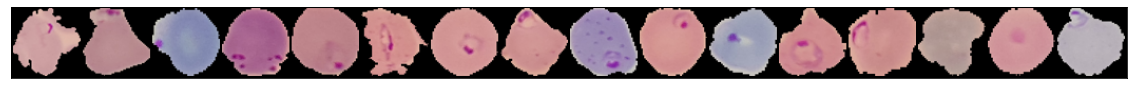

In [31]:
show_batch(train_loader)

In [32]:
# Generator Model Class Definition     
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Block 1:input is Z, going into a convolution
            nn.ConvTranspose2d(latent_dim, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            # Block 2: input is (64 * 8) x 4 x 4
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            # Block 3: input is (64 * 4) x 8 x 8
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            # Block 4: input is (64 * 2) x 16 x 16
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Block 5: input is (64) x 32 x 32
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # Output: output is (3) x 64 x 64
            )
    def forward(self, input):
        output = self.main(input)
        return output

In [33]:
# Discriminator Model Class Definition
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Block 1: input is (3) x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 2: input is (64) x 32 x 32
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 3: input is (64*2) x 16 x 16
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 4: input is (64*4) x 8 x 8
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 5: input is (64*8) x 4 x 4
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
            nn.Flatten()
            # Output: 1
            )
    def forward(self, input):
        output = self.main(input)
        return output

In [34]:
generator = Generator().to(device)
generator.apply(weights_init_normal)
print(generator)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [35]:
discriminator = Discriminator().to(device)
discriminator.apply(weights_init_normal)
print(discriminator)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
    (13): Flatten(start_dim=1, end_d

In [36]:
summary(generator, (100,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

In [37]:
summary(discriminator, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,072
         LeakyReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 16, 16]         131,072
       BatchNorm2d-4          [-1, 128, 16, 16]             256
         LeakyReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6            [-1, 256, 8, 8]         524,288
       BatchNorm2d-7            [-1, 256, 8, 8]             512
         LeakyReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 512, 4, 4]       2,097,152
      BatchNorm2d-10            [-1, 512, 4, 4]           1,024
        LeakyReLU-11            [-1, 512, 4, 4]               0
           Conv2d-12              [-1, 1, 1, 1]           8,192
          Sigmoid-13              [-1, 1, 1, 1]               0
          Flatten-14                   

In [38]:
adversarial_loss = nn.BCELoss()

In [39]:
def generator_loss(fake_output, label):
    gen_loss = adversarial_loss(fake_output, label)
    #print(gen_loss)
    return gen_loss

In [40]:
def discriminator_loss(output, label):
    disc_loss = adversarial_loss(output, label)
    return disc_loss

In [41]:
fixed_noise = torch.randn(128, latent_dim, 1, 1, device=device)
real_label = 1
fake_label = 0

In [42]:
learning_rate = 0.0002
G_optimizer = optim.Adam(generator.parameters(), lr = learning_rate, betas=(0.5, 0.999))
D_optimizer = optim.Adam(discriminator.parameters(), lr = learning_rate, betas=(0.5, 0.999))

In [43]:
def train_and_generate():
    num_epochs = 50
    D_loss_plot, G_loss_plot = [], []
    for epoch in range(1, num_epochs+1): 

        D_loss_list, G_loss_list = [], []

        for index, (real_images, _) in enumerate(train_loader):
            D_optimizer.zero_grad()
            real_images = real_images.to(device)

            real_target = Variable(torch.ones(real_images.size(0)).to(device))
            fake_target = Variable(torch.zeros(real_images.size(0)).to(device))

            real_target = real_target.unsqueeze(1)
            fake_target = fake_target.unsqueeze(1)

            D_real_loss = discriminator_loss(discriminator(real_images), real_target)
            # print(discriminator(real_images))
            D_real_loss.backward()

            noise_vector = torch.randn(real_images.size(0), latent_dim, 1, 1, device=device)  
            noise_vector = noise_vector.to(device)

            generated_image = generator(noise_vector)
            output = discriminator(generated_image.detach())
            D_fake_loss = discriminator_loss(output,  fake_target)


            # train with fake
            D_fake_loss.backward()

            D_total_loss = D_real_loss + D_fake_loss
            D_loss_list.append(D_total_loss)

            #D_total_loss.backward()

            D_optimizer.step()

            # Train generator with real labels
            G_optimizer.zero_grad()
            G_loss = generator_loss(discriminator(generated_image), real_target)
            G_loss_list.append(G_loss)

            G_loss.backward()
            G_optimizer.step()


        print('Epoch: [%d/%d]: D_loss: %.3f, G_loss: %.3f' % (
                (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
                 torch.mean(torch.FloatTensor(G_loss_list))))

        D_loss_plot.append(torch.mean(torch.FloatTensor(D_loss_list)))
        G_loss_plot.append(torch.mean(torch.FloatTensor(G_loss_list)))

        if epoch == 50:
            for i in range(generated_image.shape[0]):
                save_image(generated_image[i], '/content/drive/MyDrive/Parasitized_generated/parasitized%d.png' %i, normalize=True)
        else:
            pass

    #torch.save(generator.state_dict(), left_path + '/generator_epoch_%d.pth' % (epoch))
    #torch.save(discriminator.state_dict(), left_path + '/discriminator_epoch_%d.pth' % (epoch))

In [ ]:
train_and_generate()